# Plots

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pickle
import math

In [2]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
names = ["green", "orange", "skyblue", "pink", "yellow", "purple", "red", "blue"]
palette_named = dict(zip(names, sns.color_palette("Set2").as_hex()))

In [3]:
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 16,        # global base font
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
})
mpl.rcParams["grid.linestyle"] = "--"   # dashed
mpl.rcParams["grid.linewidth"] = 0.8    # optional


## Fig-1: LN positions control grokking (poc)

### 5 seed poc: mean aggr.

off 7763
attn-pre 7126
pre 3297
mlp-pre 954


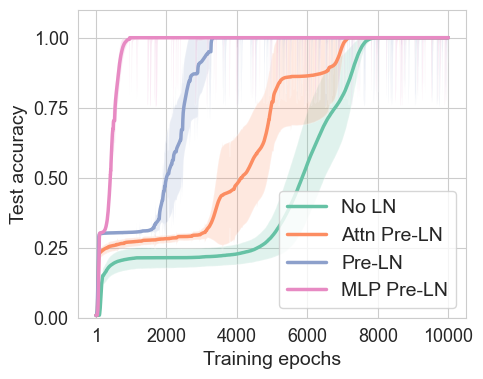

In [104]:
df = pd.read_csv("./data/trf-1l_lecun_test_acc.csv")
maxit = lambda x: f"model.ln_type: {x} - test/accuracy__MAX"
minit =  lambda x: f"model.ln_type: {x} - test/accuracy__MIN"
meanit =  lambda x: f"model.ln_type: {x} - test/accuracy"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}
t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for t in t2:
    tmp = df[meanit(t)].tolist()
    if t != "off":
        idx_gen = (df[meanit(t)] >= 0.995).tolist().index(True)
        data[t] = tmp[:idx_gen] + [1.0 for _ in range(len(tmp)-idx_gen)]
    else:
        idx_gen = (df[meanit(t)] >= 0.995).tolist().index(True)
        data[t] = tmp
    print(t, idx_gen)
    # data[t] = df[meanit(t)]
    y = np.maximum.accumulate(data[t])#[:8000]
    # plt.plot(steps[:8000], y, label=position_map[t], linewidth=2.5)
    plt.plot(steps, y, label=position_map[t], linewidth=2.5)
    std = -1*(df[minit(t)] - df[maxit(t)]) / 4
    # upp = [min(item + s, 1.0) for item, s in zip(y, std[:8000])]
    upp = [min(item + s, 1.0) for item, s in zip(y, std)]
    # plt.fill_between(steps[:8000], y-std[:8000], upp, alpha=0.2)
    plt.fill_between(steps, y-std, upp, alpha=0.2)

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Test accuracy", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0], fontsize=13)
plt.ylim([0, 1.1])
plt.savefig("./figs/ln_poc_mean_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seed poc: max aggr.

off 6613
attn-pre 3718
pre 2510
mlp-pre 859


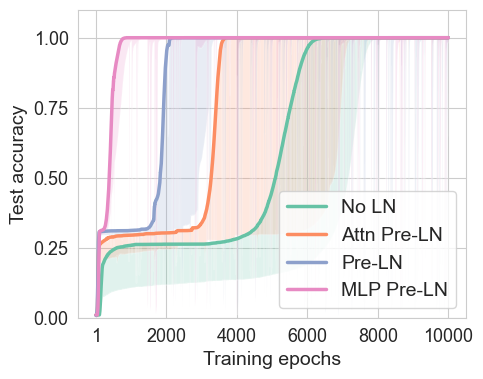

In [105]:
types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/trf-1l_lecun_test_acc.csv")
maxit = lambda x: f"model.ln_type: {x} - test/accuracy__MAX"
minit =  lambda x: f"model.ln_type: {x} - test/accuracy__MIN"
meanit =  lambda x: f"model.ln_type: {x} - test/accuracy"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}
t2 = types
t2[0] = "off"

plt.figure(figsize=(5, 4))
for t in t2:
    tmp = df[maxit(t)].tolist()
    data[t] = tmp
    idx_gen = (df[maxit(t)] == 1.0).tolist().index(True)
    print(t, idx_gen)
    y = np.maximum.accumulate(tmp)#[:8000]
    # plt.plot(steps[:8000], y, label=position_map[t], linewidth=2.5)
    plt.plot(steps, y, label=position_map[t], linewidth=2.5)
    # plt.fill_between(steps[:8000], df[minit(t)][:8000], df[maxit(t)][:8000], alpha=0.2)
    plt.fill_between(steps, df[minit(t)], df[maxit(t)], alpha=0.2)

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Test accuracy", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0], fontsize=13)
plt.ylim([0, 1.1])
plt.savefig("./figs/ln_poc_max_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

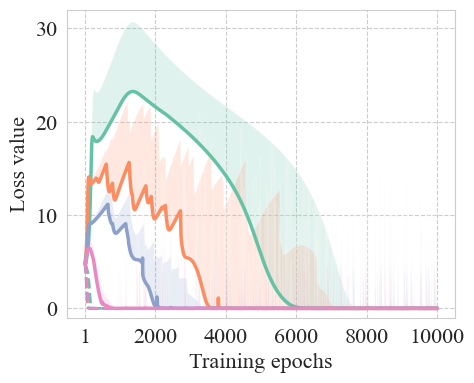

In [10]:
types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/trf-1l_lecun_test_loss.csv")
maxit = lambda x: f"model.ln_type: {x} - test/loss__MAX"
minit =  lambda x: f"model.ln_type: {x} - test/loss__MIN"
meanit =  lambda x: f"model.ln_type: {x} - test/loss"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

tdf = pd.read_csv("./data/ln_train_loss.csv")
t_minit =  lambda x: f"model.ln_type: {x} - train/loss__MIN"

t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[minit(t)].tolist()
    # y = np.maximum.accumulate(tmp)#[:8000]
    plt.plot(steps, tmp, label=position_map[t], linewidth=2.5, c=palette_named[names[i]])
    plt.fill_between(steps, df[minit(t)], df[maxit(t)], alpha=0.2)
    
    train_loss = tdf[t_minit(t)]
    plt.plot(steps, train_loss, linestyle="--", label=f"{position_map[t]} - train", linewidth=2, c=palette_named[names[i]])
    

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
# plt.legend(loc="upper right", fontsize=13)
plt.xlabel("Training epochs", fontsize=16)
plt.ylabel("Loss value", fontsize=16)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=16)
plt.yticks([0.0, 10, 20, 30], fontsize=16)
plt.ylim([-1, 32])

# ax = plt.gca()
# ax.spines["left"].set_visible(True)
# ax.spines["bottom"].set_visible(True)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# ax.spines["left"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.yaxis.set_ticks_position("left")
# ax.xaxis.set_ticks_position("bottom")

plt.savefig("./new_figs/ln_poc_test_loss_min_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

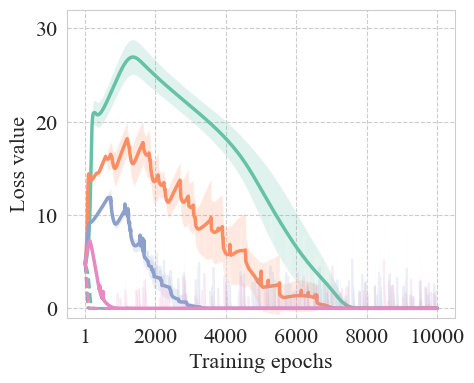

In [105]:
types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/trf-1l_lecun_test_loss.csv")
maxit = lambda x: f"model.ln_type: {x} - test/loss__MAX"
minit =  lambda x: f"model.ln_type: {x} - test/loss__MIN"
meanit =  lambda x: f"model.ln_type: {x} - test/loss"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

t2 = types
t2[0] = "off"


tdf = pd.read_csv("./data/ln_train_loss.csv")
t_meanit =  lambda x: f"model.ln_type: {x} - train/loss"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[meanit(t)]
    idx_gen = (tmp <= 0.01).to_list().index(True)
    y = tmp.copy()
    if t == "pre":
        y[1700:3600] = np.minimum.accumulate(y[1700:3600])
    if t == "mlp-pre":
        y[800:1200] = np.minimum.accumulate(y[800:1200])
    y[idx_gen:] = 0.01
    plt.plot(steps, y, label=position_map[t], linewidth=2.5, c=palette_named[names[i]])
    plt.plot(steps, tmp, alpha=0.15, c=palette_named[names[i]])
    std = (df[maxit(t)]-df[minit(t)]) / 4
    plt.fill_between(steps, tmp-std, tmp+std, alpha=0.2)
    

    train_loss = np.minimum.accumulate(tdf[t_meanit(t)])
    plt.plot(steps, train_loss, linestyle="--", label=f"{position_map[t]} - train", linewidth=2, c=palette_named[names[i]])

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
# plt.legend(loc="upper right", fontsize=16)
plt.xlabel("Training epochs", fontsize=16)
plt.ylabel("Loss value", fontsize=16)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=16)
plt.yticks([0.0, 10, 20, 30], fontsize=16)
plt.ylim([-1, 32])

# ax = plt.gca()
# ax.spines["left"].set_visible(True)
# ax.spines["bottom"].set_visible(True)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# ax.spines["left"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.yaxis.set_ticks_position("left")
# ax.xaxis.set_ticks_position("bottom")

# plt.savefig("./new_figs/ln_poc_test_loss_mean_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

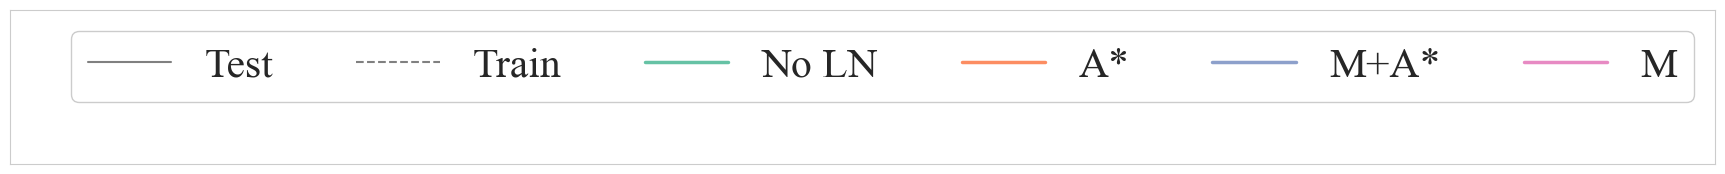

In [23]:
# print(df[meanit("mlp-pre")][2000])

new_position_map = {
    "off": "No LN",
    "attn-pre": r"A*",
    "pre": r"M+A*",
    "mlp-pre": r"M"
}
t2 = list(new_position_map.keys())
plt.figure(figsize=(22,2))

plt.plot([], [], label="Test", c="gray")
plt.plot([], [], linestyle="--", label="Train", c="gray")

for i, t in enumerate(t2):
    plt.plot([], [], label=new_position_map[t], linewidth=2.5, c=palette_named[names[i]])
    # plt.plot([], [], linestyle="--", label=f"{new_position_map[t]} - train", linewidth=2, c=palette_named[names[i]])

plt.legend(loc="upper right", fontsize=30, framealpha=1, ncols=6)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.savefig("./new_figs/ln_legend.png", dpi=300, bbox_inches="tight")
plt.show()

## Fig-2: Fourier variance ratios

### 5 seed poc: mean & max aggr.

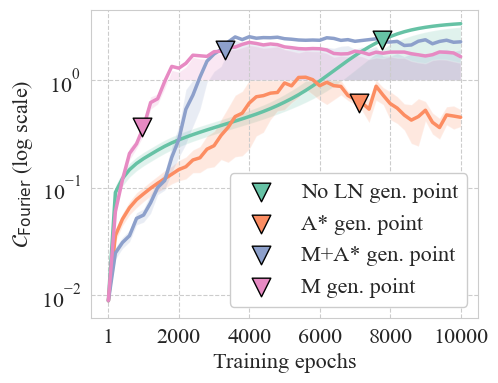

In [35]:

gen_points = {
    "off": 7763,
    "attn-pre": 7126,
    "pre": 3297,
    "mlp-pre": 954
}

df = pd.read_csv("./data/trf-1l_lecun_fourier_colvar.csv")
maxit = lambda x: f"model.ln_type: {x} - fourier/col_energy__MAX"
minit =  lambda x: f"model.ln_type: {x} - fourier/col_energy__MIN"
meanit =  lambda x: f"model.ln_type: {x} - fourier/col_energy"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
new_position_map = {"off": "No LN", "pre": "M+A*", "attn-pre": "A*", "mlp-pre": "M"}
steps = df["Step"]
data = {}
t2 = ["off", "attn-pre", "pre", "mlp-pre"]

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    # plt.plot(steps[:8000], data[t][:8000], label=position_map[t], linewidth=2.5, zorder=1)
    # std = -1*(df[minit(t)] - df[maxit(t)]) / 4
    # upp = [min(item + s, 1.0) for item, s in zip(data[t][:8000], std[:8000])]
    # plt.fill_between(steps[:8000], data[t][:8000]-std[:8000], upp, alpha=0.2, zorder=0)


    plt.plot(steps, data[t], linewidth=2.5, zorder=1)
    std = -1*(df[minit(t)] - df[maxit(t)]) / 4
    upp = [min(item + s, 1.0) for item, s in zip(data[t], std)]
    plt.fill_between(steps, data[t]-std, upp, alpha=0.2, zorder=0)


for ii, t in enumerate(t2):
    d_map = {k:v for k, v in zip(steps, df[meanit(t)])}
    ij = math.ceil(gen_points[t] / 100)
    if ij % 2 != 0:
        ij -= 1
    ij = int(ij*100)
    
    # mask = (df[meanit(t)] >= 1.0).tolist()
    # index = mask.index(True)
    # y_val = df[meanit(t)]
    plt.scatter(gen_points[t], d_map[ij], marker="v", s=180, edgecolors="black",
        color=palette_named[names[ii]], label=f"{new_position_map[t]} gen. point",
        zorder=2
    )    


plt.legend(loc="lower right", fontsize=16, framealpha=1)
# plt.title(r"$\operatorname{Var}_{\text{across}}(\widetilde{W}_E) \ / \ \operatorname{Var}_{within}(\widetilde{W}_E)$", fontsize=16)
plt.xlabel("Training epochs", fontsize=16)
plt.ylabel(r"$\mathcal{C}_{\text{Fourier}}$ (log scale)", fontsize=16)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=16)
plt.yticks([1e-3, 1e-2, 0.1, 1.0, 10], fontsize=16)
plt.yscale("log")
plt.savefig("./new_figs/ln_fourier_curves.png", dpi=300, bbox_inches="tight")
plt.show()

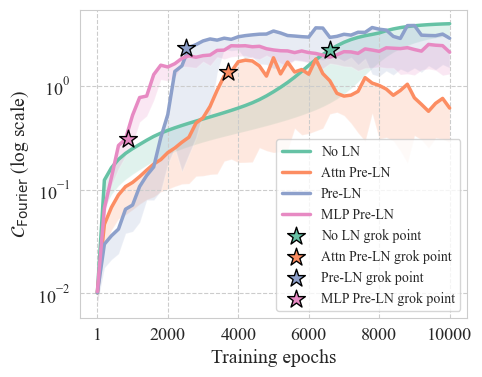

In [44]:

gen_points = {
    "off": 6613,
    "attn-pre": 3718,
    "pre":2510,
    "mlp-pre":859
}

df = pd.read_csv("./data/trf-1l_lecun_fourier_colvar.csv")
maxit = lambda x: f"model.ln_type: {x} - fourier/col_energy__MAX"
minit =  lambda x: f"model.ln_type: {x} - fourier/col_energy__MIN"
meanit =  lambda x: f"model.ln_type: {x} - fourier/col_energy"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}
t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[maxit(t)]
    # plt.plot(steps[:8000], data[t][:8000], label=position_map[t], linewidth=2.5, zorder=1)
    # plt.fill_between(steps[:8000], df[minit(t)][:8000], df[maxit(t)][:8000], alpha=0.2, zorder=0)
    
    plt.plot(steps, data[t], label=position_map[t], linewidth=2.5, zorder=1)
    plt.fill_between(steps, df[minit(t)], df[maxit(t)], alpha=0.2, zorder=0)

for ii, t in enumerate(t2):
    d_map = {k:v for k, v in zip(steps, df[maxit(t)])}
    ij = math.ceil(gen_points[t] / 100)
    if ij % 2 != 0:
        ij -= 1
    ij = int(ij*100)
    plt.scatter(gen_points[t], d_map[ij], marker="*", s=180, 
                edgecolors="black", color=palette_named[names[ii]], 
                label=f"{position_map[t]} grok point", zorder=2
    )    


plt.legend()
# plt.title(r"$\operatorname{Var}_{\text{across}}(\widetilde{W}_E) \ / \ \operatorname{Var}_{within}(\widetilde{W}_E)$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"$\mathcal{C}_{\text{Fourier}}$ (log scale)", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([1e-3, 1e-2, 0.1, 1.0, 10], fontsize=13)
plt.yscale("log")
# plt.savefig("./figs/ln_fourier_energy_max_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

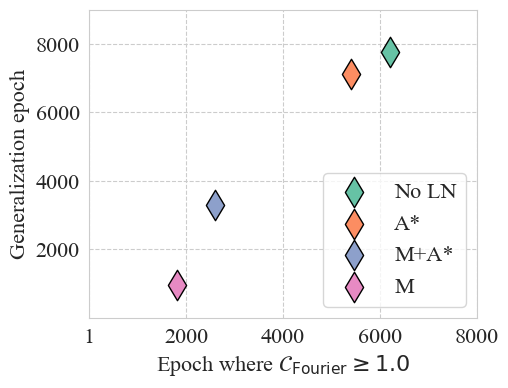

In [33]:

# gen_points = {
#     "off": 6613,
#     "attn-pre": 3718,
#     "pre":2510,
#     "mlp-pre":859
# }
gen_points = {
    "off": 7763,
    "attn-pre": 7126,
    "pre": 3297,
    "mlp-pre": 954
}

types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/trf-1l_lecun_fourier_colvar.csv")
maxit = lambda x: f"model.ln_type: {x} - fourier/col_energy__MAX"
minit =  lambda x: f"model.ln_type: {x} - fourier/col_energy__MIN"
meanit =  lambda x: f"model.ln_type: {x} - fourier/col_energy"
steps = df["Step"]
data = {}
t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    mask = (df[meanit(t)] >= 1.0).tolist()
    index = mask.index(True)
    x_val = steps[index]
    y_val = gen_points[t]
    
    plt.scatter([x_val], [y_val], label=new_position_map[t], marker="d", s=2*120, edgecolors="black", zorder=1)

plt.legend(loc="lower right", fontsize=16)
plt.xlabel(r"Epoch where $\mathcal{C}_{\text{Fourier}} \geq 1.0$", fontsize=16)
plt.ylabel("Generalization epoch", fontsize=16)
plt.xticks([1]+[u*1000 for u in [2,4,6,8]], fontsize=16)
plt.yticks([u*1000 for u in [2,4,6,8]], fontsize=16)
plt.xlim([1, 8000])
plt.ylim([1, 9000])
plt.savefig("./new_figs/fourier_scatter.png", dpi=300, bbox_inches="tight")
plt.show()
    

## Fig-3: Lazy-learning (eps=1e-8)

### 5 seed faulty

In [15]:
sns.color_palette("coolwarm", as_cmap=False)

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

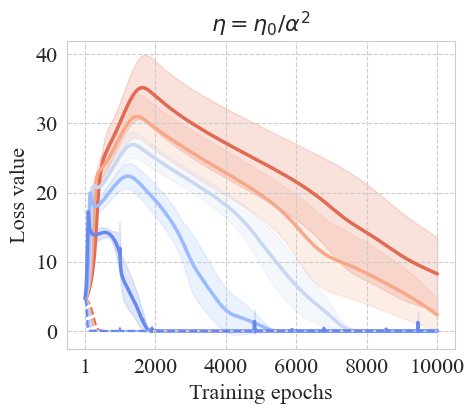

In [5]:

df = pd.read_csv("./data/lazy_wrong_test_loss.csv")
maxit = lambda x: f"model.output_scaling: {x} - test/loss__MAX"
minit =  lambda x: f"model.output_scaling: {x} - test/loss__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - test/loss"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
pal_map = dict(zip(alphas, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]]))
t2.reverse() 

tdf = pd.read_csv("./data/lazy_wrong_train_loss.csv")
t_meanit =  lambda x: f"model.output_scaling: {x} - train/loss"

plt.figure(figsize=(5,4))
plt.plot([], [], label="Test loss", c="gray", linewidth=2.5)
plt.plot([], [], label="Train loss", linestyle="--", c="gray")

for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 4
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])
    
    plt.plot(steps, tdf[t_meanit(t)], linestyle="--", c=pal_map[t])

# plt.legend(loc="upper center", fontsize=14, ncol=8)
plt.title(r"$\eta=\eta_0/\alpha^2$", fontsize=16)
plt.xlabel("Training epochs")
plt.ylabel("Loss value")
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]])
plt.yticks([0, 10, 20, 30, 40])
plt.savefig("./new_figs/lazy_wrong_test_loss_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

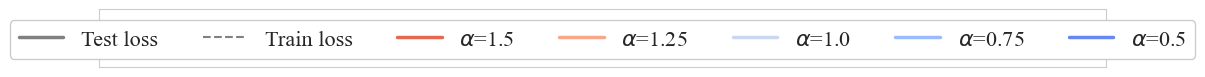

In [50]:

plt.figure(figsize=(13,0.75))
plt.plot([], [], label="Test loss", c="gray", linewidth=2.5)
plt.plot([], [], label="Train loss", linestyle="--", c="gray")

for ii, t in enumerate(t2):
    l = str(t) if t != 1 else "1.0"
    plt.plot([], [], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.legend(ncol=7, loc="upper center", framealpha=1)
plt.savefig("./new_figs/lazy_legend.png")
plt.show()

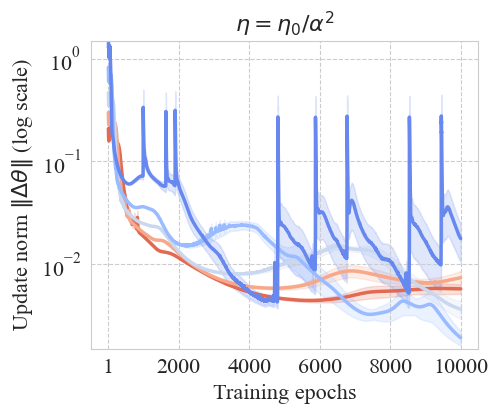

In [6]:

df = pd.read_csv("./data/lazy_wrong_update_norm.csv")
maxit = lambda x: f"model.output_scaling: {x} - grads/update_norm__MAX"
minit =  lambda x: f"model.output_scaling: {x} - grads/update_norm__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - grads/update_norm"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
pal_map = dict(zip(alphas, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]]))
t2.reverse() 

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

# plt.legend(loc="upper right")
plt.title(r"$\eta=\eta_0/\alpha^2$", fontsize=16)
plt.xlabel("Training epochs")
plt.ylabel(r"Update norm $\|\Delta\theta\|$ (log scale)")
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]])
plt.yticks([1e-2, 1e-1, 1])
plt.ylim([0.0015, 1.5])
plt.yscale("log")
plt.savefig("./new_figs/lazy_wrong_update_norm_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### NTK (faulty)

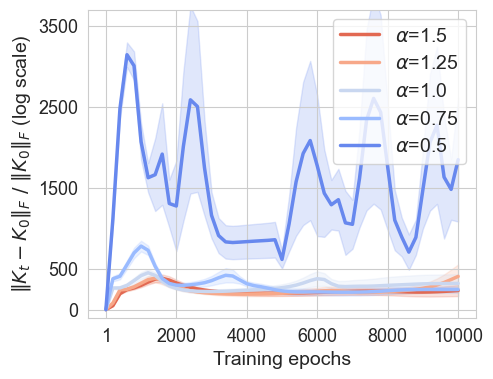

In [92]:

t2 = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/lazy_wrong_ntk.csv")
maxit = lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MAX"
minit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
pal_map = dict(zip(alphas, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]]))
t2.reverse() 

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
# plt.title(r"Effect of $\alpha$ on $\|\Delta \theta\|$ with $\eta=\eta_0/\alpha^2$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"$\|K_t-K_0\|_F \ / \ \|K_0\|_F$ (log scale)", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]], fontsize=13)
plt.yticks([u*100 for u in [0, 5, 15, 25, 35]], fontsize=13)
plt.ylim([-100, 3700])
# plt.yscale("log")
plt.savefig("./figs/lazy_wrong_ntk_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### NTK (correct)

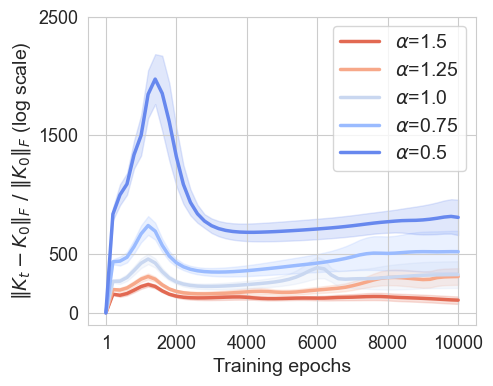

In [93]:
t2 = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/lazy_ntk.csv")
maxit = lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MAX"
minit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
pal_map = dict(zip(alphas, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]]))
t2.reverse() 

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
# plt.title(r"Effect of $\alpha$ on $\|\Delta \theta\|$ with $\eta=\eta_0/\alpha^2$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"$\|K_t-K_0\|_F \ / \ \|K_0\|_F$ (log scale)", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]], fontsize=13)
plt.yticks([u*100 for u in [0, 5, 15, 25]], fontsize=13)
plt.ylim([-100, 2500])
# plt.yscale("log")
plt.savefig("./figs/lazy_ntk_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seed correct

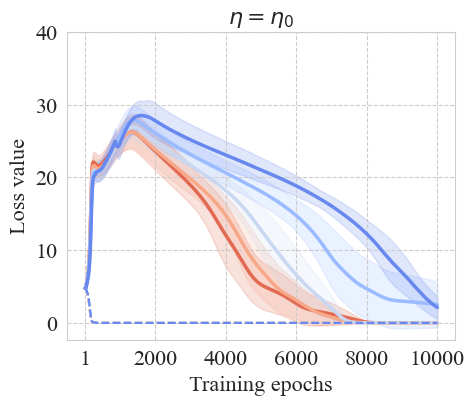

In [7]:

df = pd.read_csv("./data/lazy_test_loss.csv")
maxit = lambda x: f"model.output_scaling: {x} - test/loss__MAX"
minit =  lambda x: f"model.output_scaling: {x} - test/loss__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - test/loss"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
pal_map = dict(zip(alphas, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]]))
t2.reverse() 


tdf = pd.read_csv("./data/lazy_train_loss.csv")
t_meanit =  lambda x: f"model.output_scaling: {x} - train/loss"

plt.figure(figsize=(5,4))
plt.plot([], [], label="Test loss", c="gray", linewidth=2.5)
plt.plot([], [], label="Train loss", linestyle="--", c="gray")

for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 4
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])
    
    plt.plot(steps, tdf[t_meanit(t)], linestyle="--", c=pal_map[t])

# plt.legend(fontsize=14)
plt.title(r"$\eta=\eta_0$", fontsize=16)
plt.xlabel("Training epochs")
plt.ylabel("Loss value")
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]])
plt.yticks([0, 10, 20, 30, 40])
plt.savefig("./new_figs/lazy_test_loss_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

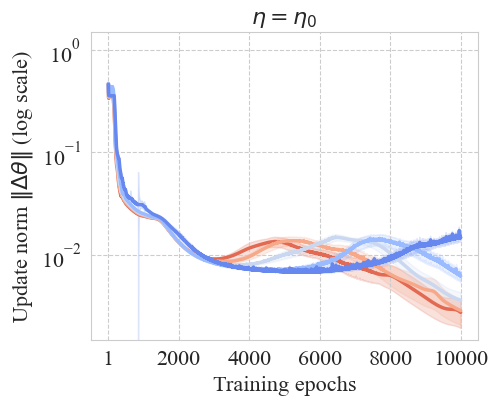

In [8]:

import warnings
warnings.simplefilter("ignore")
df = pd.read_csv("./data/lazy_update_norm.csv")
maxit = lambda x: f"model.output_scaling: {x} - grads/update_norm__MAX"
minit =  lambda x: f"model.output_scaling: {x} - grads/update_norm__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - grads/update_norm"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
pal_map = dict(zip(alphas, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]]))
t2.reverse() 

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    if t == 0.5:
        data[t][:2000] = np.minimum.accumulate(df[meanit(t)].copy()[:2000])
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

# plt.legend(loc="upper right", fontsize=14)
plt.title(r"$\eta=\eta_0$", fontsize=16)

plt.xlabel("Training epochs")
plt.ylabel(r"Update norm $\|\Delta\theta\|$ (log scale)")
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]])
plt.yticks([1e-2, 1e-1, 1])
plt.ylim([0.0015, 1.5])
plt.yscale("log")
plt.savefig("./new_figs/lazy_update_norm_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

## Fig-4: Weight decay

### 5 seed, fixed lr=1e-3, test loss

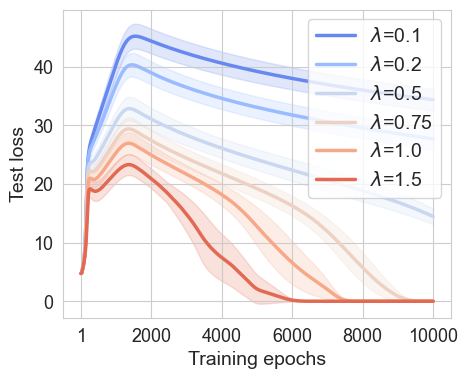

In [124]:

df = pd.read_csv("./data/weight_decay_test_loss.csv")
maxit = lambda x: f"opt.weight_decay: {x} - test/loss__MAX"
minit =  lambda x: f"opt.weight_decay: {x} - test/loss__MIN"
meanit =  lambda x: f"opt.weight_decay: {x} - test/loss"

steps = df["Step"]
data = {}
t2 = [0.1, 0.2, 0.5, 0.75, 1, 1.5]
alphas = t2
pal_map = dict(zip(alphas, sns.color_palette("coolwarm", as_cmap=False).as_hex()))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\lambda$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 4
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
# plt.title(r"Effect of $\lambda$ on test loss with $\eta=0.001$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Test loss", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([0, 10, 20, 30, 40], fontsize=13)
plt.savefig("./figs/weight_decay_test_loss_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seed, fixed lr=1e-3, update norm

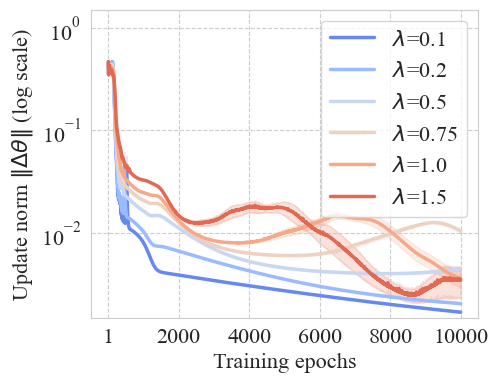

In [96]:

df = pd.read_csv("./data/weight_decay_update_norm.csv")
maxit = lambda x: f"opt.weight_decay: {x} - grads/update_norm__MAX"
minit =  lambda x: f"opt.weight_decay: {x} - grads/update_norm__MIN"
meanit =  lambda x: f"opt.weight_decay: {x} - grads/update_norm"

steps = df["Step"]
data = {}
t2 = [0.1, 0.2, 0.5, 0.75, 1, 1.5]
alphas = t2
pal_map = dict(zip(alphas, sns.color_palette("coolwarm", as_cmap=False).as_hex()))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t != 1 else "1.0"
    plt.plot(steps, data[t], label=r"$\lambda$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=16)
# plt.title(r"Effect of $\lambda$ on $\|\Delta \theta\|$ with $\eta=0.001$", fontsize=16)

plt.xlabel("Training epochs")
plt.ylabel(r"Update norm $\|\Delta\theta\|$ (log scale)")
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]])
plt.yticks([1e-2, 1e-1, 1])
plt.ylim([0.0015, 1.5])
plt.yscale("log")
plt.savefig("./new_figs/weight_decay_update_norm_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

## Fig-5: Learning rate

### 5 seeds, fixed wd=1e-3 (def lr multiplied, else 1.0)

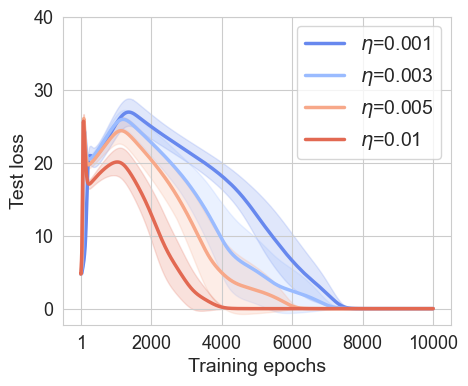

In [126]:

df = pd.read_csv("./data/lr_test_loss.csv")
maxit = lambda x: f"opt.learning_rate: {x} - test/loss__MAX"
minit =  lambda x: f"opt.learning_rate: {x} - test/loss__MIN"
meanit =  lambda x: f"opt.learning_rate: {x} - test/loss"

steps = df["Step"]
data = {}
t2 = [0.001, 0.003, 0.005, 0.01]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t)
    plt.plot(steps, data[t], label=r"$\eta$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 4
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
# plt.title(r"Effect of $\eta$ on test loss with $\lambda=0.001$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Test loss", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([0, 10, 20, 30, 40], fontsize=13)
plt.savefig("./figs/lr_test_loss_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

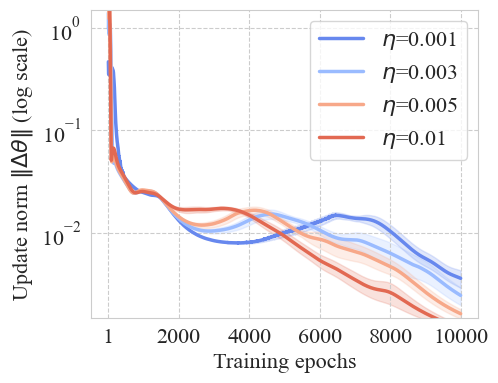

In [94]:

df = pd.read_csv("./data/lr_update_norm.csv")
maxit = lambda x: f"opt.learning_rate: {x} - grads/update_norm__MAX"
minit =  lambda x: f"opt.learning_rate: {x} - grads/update_norm__MIN"
meanit =  lambda x: f"opt.learning_rate: {x} - grads/update_norm"

steps = df["Step"]
data = {}
t2 = [0.001, 0.003, 0.005, 0.01]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t)
    plt.plot(steps, data[t], label=r"$\eta$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=16)
# plt.title(r"Effect of $\eta$ on $\|\Delta \theta\|$ with $\lambda=0.001$", fontsize=16)

plt.xlabel("Training epochs")
plt.ylabel(r"Update norm $\|\Delta \theta\|$ (log scale)")
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]])
plt.yticks([1e-2, 1e-1, 1])
plt.ylim([0.0015, 1.5])
plt.yscale("log")
plt.savefig("./new_figs/lr_update_norm_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

## LR v/s WD v/s Gen point

0.1
0.2
0.5


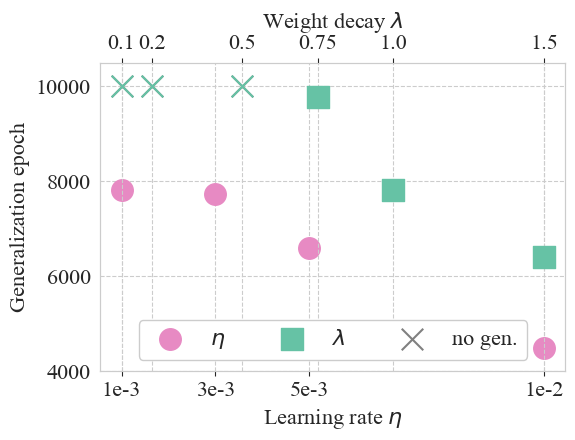

In [52]:
lr_df = pd.read_csv("./data/lr_test_loss.csv")
wd_df = pd.read_csv("./data/weight_decay_test_loss.csv")

lr_mean = lambda x: f"opt.learning_rate: {x} - test/loss"
wd_mean = lambda x: f"opt.weight_decay: {x} - test/loss"

lrs = [1e-3, 3e-3, 5e-3, 1e-2]
wds = [0.1, 0.2, 0.5, 0.75, 1.0, 1.5]
steps = lr_df["Step"]

lr_points = []
wd_points = []

for lr in lrs:
    lr_data = lr_df[lr_mean(lr)]
    lr_mask = (lr_data <= 0.01).tolist()
    if True in lr_mask:
        lr_point = steps[lr_mask.index(True)]
        lr_points.append(lr_point)
    else:
        lr_points.append(10000)
        
for wd in wds:
    if wd != 1.0:
        wd_data = wd_df[wd_mean(wd)]
    else:
        wd_data = wd_df[wd_mean(1)]
    wd_mask = (wd_data <= 0.01).tolist()
    if True in wd_mask:
        wd_point = steps[wd_mask.index(True)]
        wd_points.append(wd_point)
    else:
        print(wd)
        wd_points.append(10000)

plt.figure(figsize=(6,4))
plt.scatter(lrs, lr_points, marker="o", s=240, c=palette_named["pink"], zorder=2, label=r"$\eta$")
plt.xlabel(r"Learning rate $\eta$", fontsize=16)
plt.ylabel("Generalization epoch", fontsize=16)
plt.xticks(lrs, ["1e-3", "3e-3", "5e-3", "1e-2"], fontsize=16)
plt.yticks([i*1000 for i in [4,6,8,10]], ["4000", "6000", "8000", "10000"])
plt.ylim([4000, 10500])

# plt.scatter([], [], marker="x", s=240, c="gray", zorder=1, label="no gen.")
# plt.legend(loc="lower center", ncol=3, framealpha=1)

ax = plt.gca()
ax_top = ax.twiny()
ax_top.scatter([], [], marker="o", s=240, c=palette_named["pink"], label=r"$\eta$")
ax_top.scatter(wds[3:], wd_points[3:], marker="s", s=240, c=palette_named["green"], zorder=2, label=r"$\lambda$")
ax_top.scatter(wds[:3], wd_points[:3], marker="x", s=240, c="gray", zorder=1, label="no gen.")
ax_top.scatter(wds[:3], wd_points[:3], marker="x", s=240, c=palette_named["green"], zorder=2)
ax_top.set_xlabel(r"Weight decay $\lambda$")
ax_top.set_xticks(wds, ["0.1", "0.2", "0.5", "0.75", "1.0", "1.5"], fontsize=16)
ax_top.legend(loc="lower center", ncol=3, framealpha=1, fontsize=16)
plt.savefig("./new_figs/lr_wd_gen.png", dpi=300, bbox_inches="tight")
plt.show()
        

## Sec-4: Compression under LN

### 5 seeds, rank (mean)

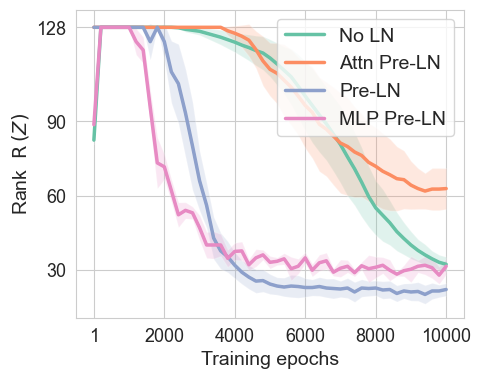

In [171]:

types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/ln_rank.csv")
maxit = lambda x: f"model.ln_type: {x} - alpha_req/rank_test__MAX"
minit =  lambda x: f"model.ln_type: {x} - alpha_req/rank_test__MIN"
meanit =  lambda x: f"model.ln_type: {x} - alpha_req/rank_test"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[meanit(t)]
    plt.plot(steps, tmp, label=position_map[t], linewidth=2.5, c=palette_named[names[i]])
    plt.plot(steps, tmp, c=palette_named[names[i]], alpha=0.3)
    std = (df[maxit(t)]-df[minit(t)]) / 4
    plt.fill_between(steps, tmp-std, tmp+std, alpha=0.2)

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"Rank  ${\operatorname{R}}(Z)$", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([30, 60, 90, 128], fontsize=13)
# plt.ylim([-1, 32])
plt.savefig("./figs/ln_rank_mean_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seeds, effective rank (mean)

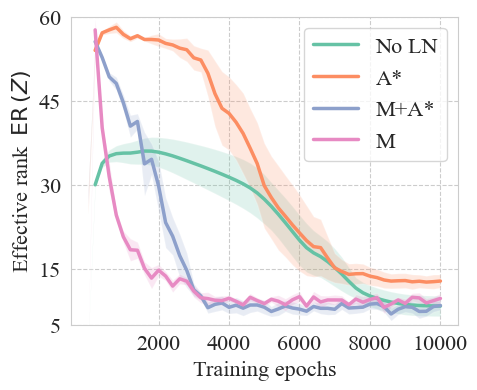

In [44]:

types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/ln_eff_rank.csv")
maxit = lambda x: f"model.ln_type: {x} - alpha_req/effective_rank_test__MAX"
minit =  lambda x: f"model.ln_type: {x} - alpha_req/effective_rank_test__MIN"
meanit =  lambda x: f"model.ln_type: {x} - alpha_req/effective_rank_test"
position_map = {"off": "No LN", "pre": "M+A*", "attn-pre": "A*", "mlp-pre": "M"}
steps = df["Step"]
data = {}

t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[meanit(t)]
    plt.plot(steps[1:], tmp[1:], label=position_map[t], linewidth=2.5, c=palette_named[names[i]])
    # plt.plot(steps, tmp, c=palette_named[names[i]], alpha=0.3)
    std = (df[maxit(t)]-df[minit(t)]) / 6
    plt.fill_between(steps, tmp-std, tmp+std, alpha=0.2)

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="upper right")
plt.xlabel("Training epochs")
plt.ylabel(r"Effective rank  ${\operatorname{ER}}(Z)$")
plt.xticks([u*1000 for u in [2,4,6,8,10]])
plt.yticks([5, 15, 30, 45, 60])
plt.ylim([5, 60])
plt.savefig("./new_figs/ln_eff_rank_mean.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seeds, alpha (mean)

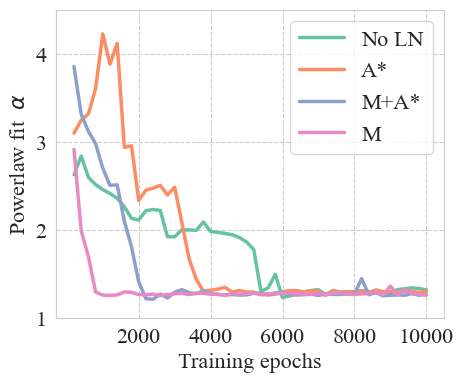

In [43]:

types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/ln_alpha.csv")
maxit = lambda x: f"model.ln_type: {x} - alpha_req/alpha_test__MAX"
minit =  lambda x: f"model.ln_type: {x} - alpha_req/alpha_test__MIN"
meanit =  lambda x: f"model.ln_type: {x} - alpha_req/alpha_test"
position_map = {"off": "No LN", "pre": "M+A*", "attn-pre": "A*", "mlp-pre": "M"}
steps = df["Step"]
data = {}

t2 = types
t2[0] = "off"

gen_points = {
    "off": 7763,
    "attn-pre": 7126,
    "pre": 3297,
    "mlp-pre": 954
}

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[minit(t)]
    plt.plot(steps[1:], tmp[1:], label=position_map[t], linewidth=2.5, c=palette_named[names[i]])
    # plt.scatter(steps[1:], tmp[1:], label=position_map[t], linewidth=2.5, marker="P", c=palette_named[names[i]])
    std = (df[maxit(t)]-df[minit(t)]) / 1
    # plt.fill_between(steps, df[minit(t)], df[maxit(t)], alpha=0.1)

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="upper right")
plt.xlabel("Training epochs")
plt.ylabel(r"Powerlaw fit  $\alpha$")
plt.xticks([u*1000 for u in [2,4,6,8,10]])
plt.yticks([1, 2, 3, 4])
plt.ylim([1, 4.5])
plt.savefig("new_figs/ln_alpha_min.png", dpi=300, bbox_inches="tight")
# plt.savefig("./figs/ln_alpha_min_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

In [37]:
types = ["off", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/ln_eff_rank.csv")
maxit = lambda x: f"model.ln_type: {x} - alpha_req/effective_rank_test__MAX"
minit =  lambda x: f"model.ln_type: {x} - alpha_req/effective_rank_test__MIN"
meanit =  lambda x: f"model.ln_type: {x} - alpha_req/effective_rank_test"
position_map = {"off": "No LN", "pre": "M+A*", "attn-pre": "A*", "mlp-pre": "M"}
steps = df["Step"]
eff_rank_data = {}


gen_points = {
    "off": 7763,
    "attn-pre": 7126,
    "pre": 3297,
    "mlp-pre": 954
}

t2 = types

for i, t in enumerate(t2):
    tmp = df[meanit(t)][1:]
    minval = tmp.min()
    mask = (tmp <= 1.1 * minval).tolist()
    st = steps[1:].tolist()[mask.index(True)]
    print(t, st)
    eff_rank_data[t] = dict(x=st, y=gen_points[t]) #, label=t+": eff_rank")
    
    

off 8600
attn-pre 8000
pre 5200
mlp-pre 4400


In [39]:
types = ["off", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/ln_alpha.csv")
maxit = lambda x: f"model.ln_type: {x} - alpha_req/alpha_test__MAX"
minit =  lambda x: f"model.ln_type: {x} - alpha_req/alpha_test__MIN"
meanit =  lambda x: f"model.ln_type: {x} - alpha_req/alpha_test"
position_map = {"off": "No LN", "pre": "M+A*", "attn-pre": "A*", "mlp-pre": "M"}
steps = df["Step"]
alpha_data = {}

t2 = types

gen_points = {
    "off": 7763,
    "attn-pre": 7126,
    "pre": 3297,
    "mlp-pre": 954
}
for i, t in enumerate(t2):
    tmp = df[meanit(t)][1:]
    minval = tmp.min()
    mask = (tmp <= 1.1 * minval).tolist()
    st = steps[1:].tolist()[mask.index(True)]
    print(t, st)
    alpha_data[t] = dict(x=st, y=gen_points[t]) #, label=t+": alpha")


off 8200
attn-pre 6800
pre 2400
mlp-pre 1000


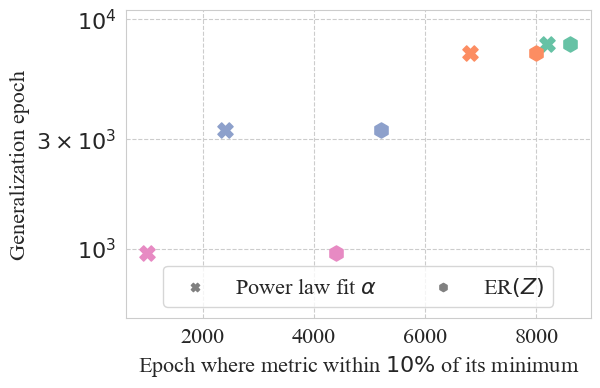

In [42]:
plt.figure(figsize=(6,4))
plt.scatter([], [], marker="X", c="gray", label=r"Power law fit $\alpha$")
plt.scatter([], [], marker="h", c="gray", label=r"ER$(Z)$")
for i, t in enumerate(t2):
    plt.scatter(**eff_rank_data[t], marker="h", c=f"C{i}", s=120)
    plt.scatter(**alpha_data[t], marker="X", c=f"C{i}", s=120)

plt.legend(ncol=2, loc="lower center")
plt.ylabel(r"Generalization epoch")
plt.yscale("log")
plt.yticks([1000, 3000, 10000], [r"$10^3$", r"$3\times 10^3$", r"$10^4$"])
plt.ylim([500, 11000])
plt.xlabel(r"Epoch where metric within $10\%$ of its minimum")
plt.savefig("new_figs/compression_scatter.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:

gen_points = {
    "off": 7763,
    "attn-pre": 7126,
    "pre": 3297,
    "mlp-pre": 954
}

types = ["none", "attn-pre", "pre", "mlp-pre"]
maxit = lambda x: f"model.ln_type: {x} - fourier/col_energy__MAX"
minit =  lambda x: f"model.ln_type: {x} - fourier/col_energy__MIN"
meanit =  lambda x: f"model.ln_type: {x} - fourier/col_energy"
steps = df["Step"]
data = {}
t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    mask = (df[meanit(t)] >= 1.0).tolist()
    index = mask.index(True)
    x_val = steps[index]
    y_val = gen_points[t]
    
    plt.scatter([x_val], [y_val], label=new_position_map[t], marker="d", s=2*120, edgecolors="black", zorder=1)

plt.legend(loc="lower right", fontsize=16)
plt.xlabel(r"Epoch where $\mathcal{C}_{\text{Fourier}} \geq 1.0$", fontsize=16)
plt.ylabel("Generalization epoch", fontsize=16)
plt.xticks([1]+[u*1000 for u in [2,4,6,8]], fontsize=16)
plt.yticks([u*1000 for u in [2,4,6,8]], fontsize=16)
plt.xlim([1, 8000])
plt.ylim([1, 9000])
plt.savefig("./new_figs/fourier_scatter.png", dpi=300, bbox_inches="tight")
plt.show()
    

### 5 seeds, param norm (mean)

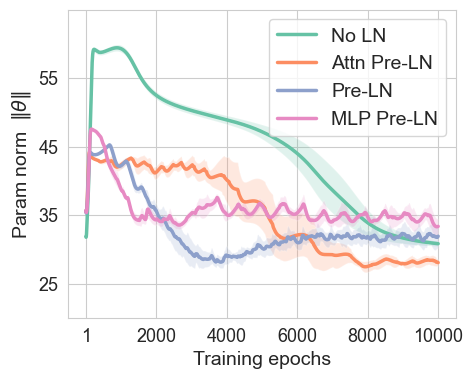

In [132]:

types = ["none", "attn-pre", "pre", "mlp-pre"]
df = pd.read_csv("./data/ln_param_norm.csv")
maxit = lambda x: f"model.ln_type: {x} - grads/weight_norm__MAX"
minit =  lambda x: f"model.ln_type: {x} - grads/weight_norm__MIN"
meanit =  lambda x: f"model.ln_type: {x} - grads/weight_norm"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

t2 = types
t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[meanit(t)]
    plt.plot(steps, tmp, label=position_map[t], linewidth=2.5, c=palette_named[names[i]])
    plt.plot(steps, tmp, c=palette_named[names[i]], alpha=0.3)
    std = (df[maxit(t)]-df[minit(t)]) / 4
    plt.fill_between(steps, tmp-std, tmp+std, alpha=0.2)

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"Param norm  $\|\theta\|$", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([25, 35, 45, 55], fontsize=13)
plt.ylim([20, 65])
plt.savefig("./figs/ln_param_norm_mean_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

## Sec: 4 Compression under weight decay

### 5 seeds, rank (mean)

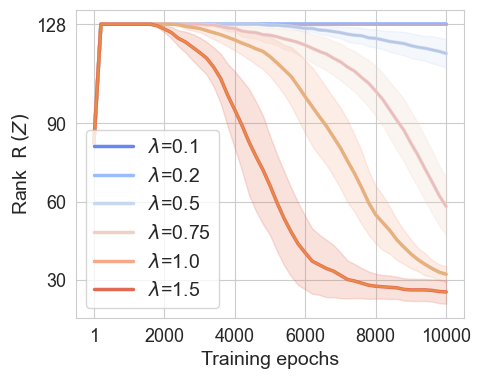

In [176]:

types = [0.1, 0.2, 0.5, 0.75, 1, 1.5]
df = pd.read_csv("./data/wd_rank.csv")
# print(df.head())
maxit = lambda x: f"opt.weight_decay: {x} - alpha_req/rank_test__MAX"
minit =  lambda x: f"opt.weight_decay: {x} - alpha_req/rank_test__MIN"
meanit =  lambda x: f"opt.weight_decay: {x} - alpha_req/rank_test"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

pal_map = dict(zip(t2, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 3, 4, 5]]))
t2 = types
# t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[meanit(t)]
    l = str(t) if t!= 1 else "1.0"
    plt.plot(steps, tmp, label=r"$\lambda$="+l, linewidth=2.5, c=pal_map[t])
    plt.plot(steps, tmp, c=palette_named[names[i]], alpha=0.3)
    std = (df[maxit(t)]-df[minit(t)]) / 4
    plt.fill_between(steps, tmp-std, tmp+std, alpha=0.2, color=pal_map[t])

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"Rank  ${\operatorname{R}}(Z)$", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([30, 60, 90, 128], fontsize=13)
# plt.ylim([-1, 32])
plt.savefig("./figs/wd_rank_mean_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seeds, effective rank (mean)

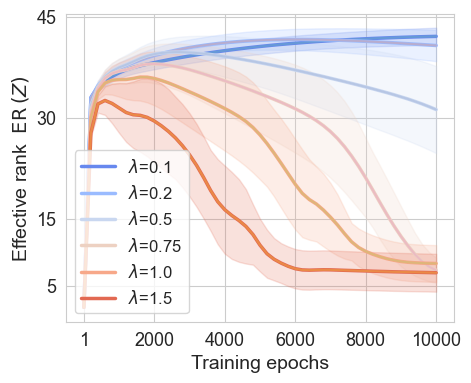

In [178]:

types = [0.1, 0.2, 0.5, 0.75, 1, 1.5]
df = pd.read_csv("./data/wd_eff_rank.csv")
# print(df.head())
maxit = lambda x: f"opt.weight_decay: {x} - alpha_req/effective_rank_test__MAX"
minit =  lambda x: f"opt.weight_decay: {x} - alpha_req/effective_rank_test__MIN"
meanit =  lambda x: f"opt.weight_decay: {x} - alpha_req/effective_rank_test"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

pal_map = dict(zip(t2, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 3, 4, 5]]))
t2 = types
# t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[meanit(t)]
    l = str(t) if t!= 1 else "1.0"
    plt.plot(steps, tmp, label=r"$\lambda$="+l, linewidth=2.5, c=pal_map[t])
    plt.plot(steps, tmp, c=palette_named[names[i]], alpha=0.3)
    std = (df[maxit(t)]-df[minit(t)]) / 4
    plt.fill_between(steps, tmp-std, tmp+std, alpha=0.2, color=pal_map[t])

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="lower left", fontsize=12)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"Effective rank  ${\operatorname{ER}}(Z)$", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([5, 15, 30, 45], fontsize=13)
# plt.ylim([-1, 32])
plt.savefig("./figs/wd_eff_rank_mean_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seeds, alpha (mean)

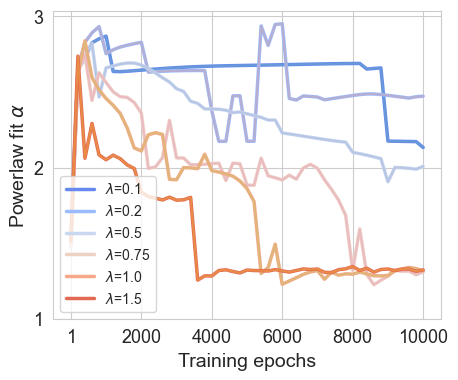

In [161]:

types = [0.1, 0.2, 0.5, 0.75, 1, 1.5]
df = pd.read_csv("./data/wd_alpha.csv")
# print(df.head())
maxit = lambda x: f"opt.weight_decay: {x} - alpha_req/alpha_test__MAX"
minit =  lambda x: f"opt.weight_decay: {x} - alpha_req/alpha_test__MIN"
meanit =  lambda x: f"opt.weight_decay: {x} - alpha_req/alpha_test"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

pal_map = dict(zip(t2, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 3, 4, 5]]))
t2 = types
# t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[minit(t)]
    l = str(t) if t!= 1 else "1.0"
    plt.plot(steps, tmp, label=r"$\lambda$="+l, linewidth=2.5, c=pal_map[t])
    plt.plot(steps, tmp, c=palette_named[names[i]], alpha=0.3)
    std = (df[maxit(t)]-df[minit(t)]) / 4
    # plt.fill_between(steps, df[minit(t)], df[maxit(t)], alpha=0.2, color=pal_map[t])

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="lower left", fontsize=10)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"Powerlaw fit $\alpha$", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([1, 2, 3], fontsize=13)
# plt.ylim([-1, 32])
plt.savefig("./figs/wd_alpha_min_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seeds, param norm (mean)

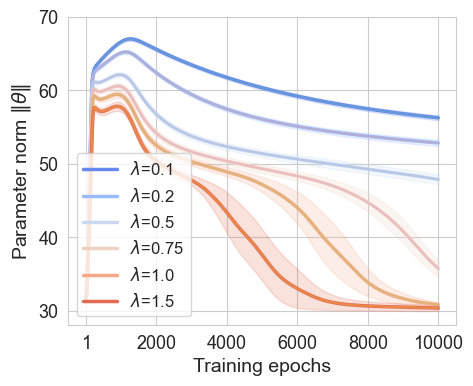

In [169]:

types = [0.1, 0.2, 0.5, 0.75, 1, 1.5]
df = pd.read_csv("./data/wd_param_norm.csv")
# print(df.head())
maxit = lambda x: f"opt.weight_decay: {x} - grads/weight_norm__MAX"
minit =  lambda x: f"opt.weight_decay: {x} - grads/weight_norm__MIN"
meanit =  lambda x: f"opt.weight_decay: {x} - grads/weight_norm"
position_map = {"off": "No LN", "pre": "Pre-LN", "attn-pre": "Attn Pre-LN", "mlp-pre": "MLP Pre-LN"}
steps = df["Step"]
data = {}

pal_map = dict(zip(t2, [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 3, 4, 5]]))
t2 = types
# t2[0] = "off"

plt.figure(figsize=(5,4))
for i, t in enumerate(t2):
    tmp = df[meanit(t)]
    l = str(t) if t!= 1 else "1.0"
    plt.plot(steps, tmp, label=r"$\lambda$="+l, linewidth=2.5, c=pal_map[t])
    plt.plot(steps, tmp, c=palette_named[names[i]], alpha=0.3)
    std = (df[maxit(t)]-df[minit(t)]) / 4
    plt.fill_between(steps, tmp-std, tmp+std, alpha=0.2, color=pal_map[t])

# plt.title("Controlling Grokking via LayerNorm", fontsize=16)
plt.legend(loc="lower left", fontsize=12)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel(r"Parameter norm $\|\theta\|$", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([30, 40, 50, 60, 70], fontsize=13)
# plt.ylim([-1, 32])
plt.savefig("./figs/wd_param_norm_mean_5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

## Fig-6: Lazy learning (eps=0.0)

### 5 seeds (wrong)

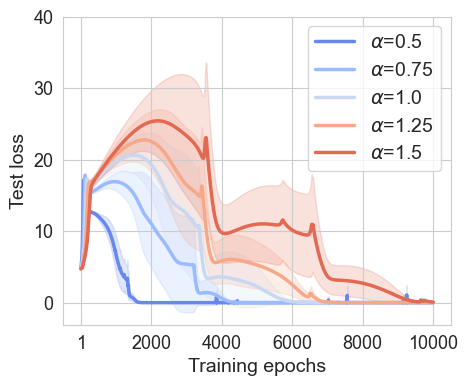

In [79]:

df = pd.read_csv("./data/wrong_eps_0_test_loss.csv")
maxit = lambda x: f"model.output_scaling: {x} - test/loss__MAX"
minit =  lambda x: f"model.output_scaling: {x} - test/loss__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - test/loss"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 4
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
# plt.title(r"Effect of $\eta$ on test loss with $\lambda=0.001$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Test loss", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([0, 10, 20, 30, 40], fontsize=13)
plt.savefig("./figs/wrong_eps_0_test_loss_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

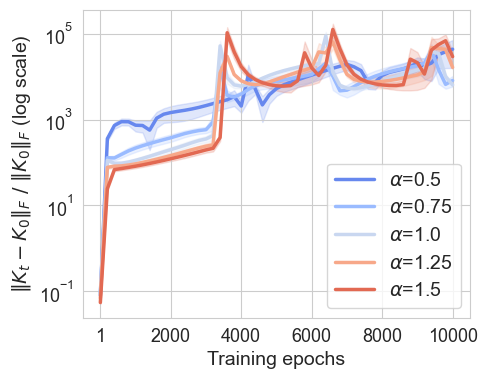

In [ ]:

df = pd.read_csv("./data/wrong_eps_0_ntk.csv")
maxit = lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MAX"
minit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 5
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yscale("log")
plt.yticks([1e-1, 1e+1, 1e+3, 1e+5], fontsize=13)
plt.ylabel(r"$\|K_t-K_0\|_F \ / \ \|K_0\|_F$ (log scale)", fontsize=14)
plt.savefig("./figs/wrong_eps_0_ntk_log_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

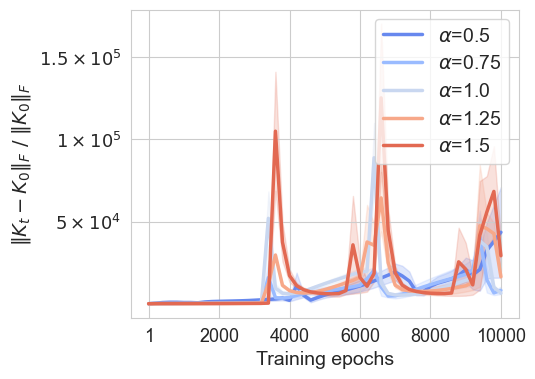

In [81]:

df = pd.read_csv("./data/wrong_eps_0_ntk.csv")
maxit = lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MAX"
minit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 5
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([5e+4, 1e+5, 1.5e+5], [r"$5\times 10^4$", r"$1\times 10^5$", r"$1.5\times 10^5$"], fontsize=13)
plt.ylabel(r"$\|K_t-K_0\|_F \ / \ \|K_0\|_F$", fontsize=14)
plt.savefig("./figs/wrong_eps_0_ntk_lin_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

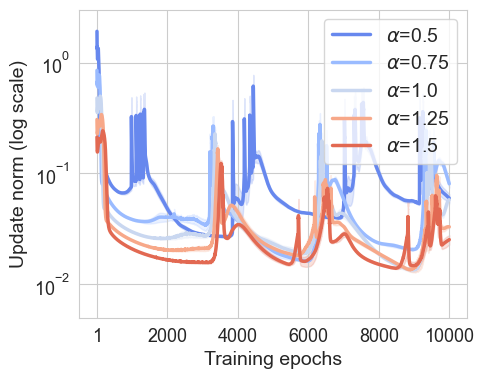

In [82]:


df = pd.read_csv("./data/wrong_eps_0_update_norm.csv")
maxit = lambda x: f"model.output_scaling: {x} - grads/update_norm__MAX"
minit =  lambda x: f"model.output_scaling: {x} - grads/update_norm__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - grads/update_norm"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5] 
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
# plt.title(r"Effect of $\eta$ on $\|\Delta \theta\|$ with $\lambda=0.001$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Update norm (log scale)", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]], fontsize=13)
plt.yscale("log")
plt.yticks([1e-2, 1e-1, 1], fontsize=13)
plt.ylim([0.005, 3])
plt.savefig("./figs/wrong_eps_0_update_norm_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

### 5 seeds (correct)

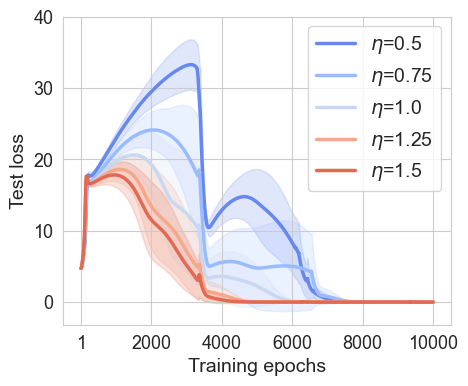

In [86]:

df = pd.read_csv("./data/eps_0_test_loss.csv")
maxit = lambda x: f"model.output_scaling: {x} - test/loss__MAX"
minit =  lambda x: f"model.output_scaling: {x} - test/loss__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - test/loss"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\eta$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 4
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Test loss", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([0, 10, 20, 30, 40], fontsize=13)
plt.savefig("./figs/eps_0_test_loss_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

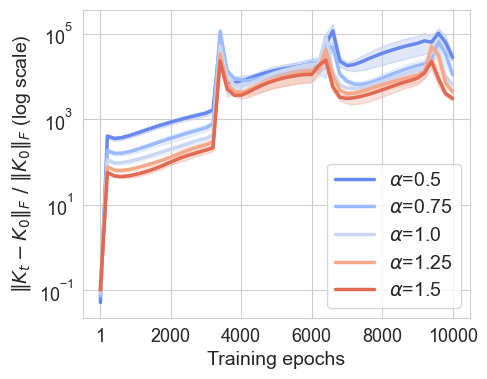

In [87]:
df = pd.read_csv("./data/eps_0_ntk.csv")
maxit = lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MAX"
minit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 5
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yscale("log")
plt.yticks([1e-1, 1e+1, 1e+3, 1e+5], fontsize=13)
plt.ylabel(r"$\|K_t-K_0\|_F \ / \ \|K_0\|_F$ (log scale)", fontsize=14)
plt.savefig("./figs/eps_0_ntk_log_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

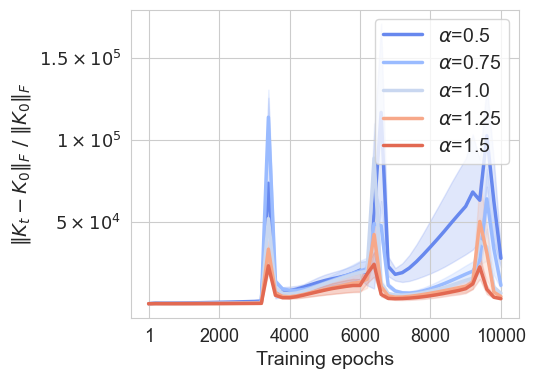

In [89]:

df = pd.read_csv("./data/eps_0_ntk.csv")
maxit = lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MAX"
minit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - ntk/relative_distance"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5]
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 5
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training epochs", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8,10]], fontsize=13)
plt.yticks([5e+4, 1e+5, 1.5e+5], [r"$5\times 10^4$", r"$1\times 10^5$", r"$1.5\times 10^5$"], fontsize=13)
plt.ylabel(r"$\|K_t-K_0\|_F \ / \ \|K_0\|_F$", fontsize=14)
plt.savefig("./figs/eps_0_ntk_lin_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()

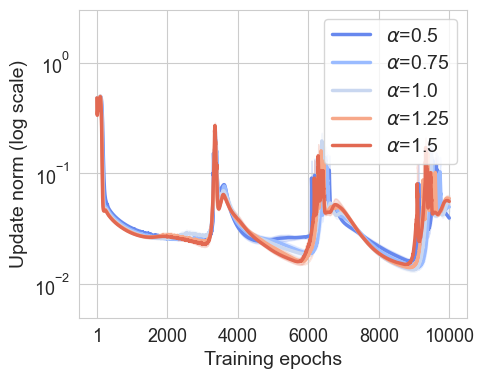

In [91]:


df = pd.read_csv("./data/eps_0_update_norm.csv")
maxit = lambda x: f"model.output_scaling: {x} - grads/update_norm__MAX"
minit =  lambda x: f"model.output_scaling: {x} - grads/update_norm__MIN"
meanit =  lambda x: f"model.output_scaling: {x} - grads/update_norm"

steps = df["Step"]
data = {}
t2 = [0.5, 0.75, 1, 1.25, 1.5] 
alphas = t2
colors = [list(sns.color_palette("coolwarm", as_cmap=False).as_hex())[k] for k in [0, 1, 2, 4, 5]] 
pal_map = dict(zip(alphas, colors))

plt.figure(figsize=(5,4))
for ii, t in enumerate(t2):
    data[t] = df[meanit(t)]
    l = str(t) if t!=1 else "1.0"
    plt.plot(steps, data[t], label=r"$\alpha$"+"="+l, linewidth=2.5, zorder=1, c=pal_map[t])
    std = (df[maxit(t)] - df[minit(t)]) / 8
    plt.fill_between(steps, data[t]-std, data[t]+std, alpha=0.2, zorder=0, color=pal_map[t])

plt.legend(loc="upper right", fontsize=14)
# plt.title(r"Effect of $\eta$ on $\|\Delta \theta\|$ with $\lambda=0.001$", fontsize=16)
plt.xlabel("Training epochs", fontsize=14)
plt.ylabel("Update norm (log scale)", fontsize=14)
plt.xticks([1]+[u*1000 for u in [2,4,6,8, 10]], fontsize=13)
plt.yscale("log")
plt.yticks([1e-2, 1e-1, 1], fontsize=13)
plt.ylim([0.005, 3])
plt.savefig("./figs/eps_0_update_norm_mean5seeds.png", dpi=300, bbox_inches="tight")
plt.show()